In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
df.shape

(10, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 264.0+ bytes


In [61]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


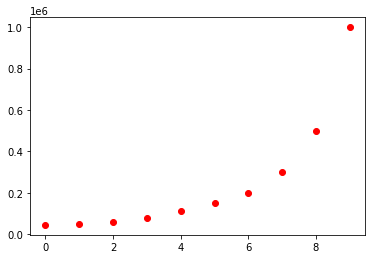

In [66]:
plt.plot(df['Salary'],'ro')
plt.show()

In [23]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [24]:
x.shape, y.shape

((10, 1), (10,))

## Trying to fit linear regression model

In [26]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [27]:
y_pred = lr.predict(x)

mse = mean_squared_error(y_pred,y)
mse

26695878787.878784

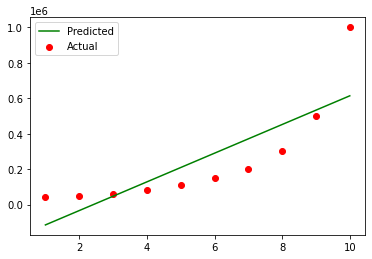

In [28]:
plt.scatter(df['Level'],df['Salary'],color='red',label='Actual')
plt.plot(df['Level'],y_pred,color='green',label='Predicted')
plt.legend()
plt.show()

## Trying Polynomial Linear Regression

In [49]:
poly_reg = PolynomialFeatures(degree=2)

In [50]:
x_poly = poly_reg.fit_transform(x)

In [51]:
lr2 = LinearRegression()

In [52]:
lr2.fit(x_poly,y)

LinearRegression()

In [70]:
y_pred_2 = lr2.predict(x_poly)

mss2 = mean_squared_error(y_pred_2,y)

In [71]:
print('MSE = ',mse2)
print('RMSE = ',sqrt(mse2))

MSE =  6758833333.333334
RMSE =  82212.12400451246


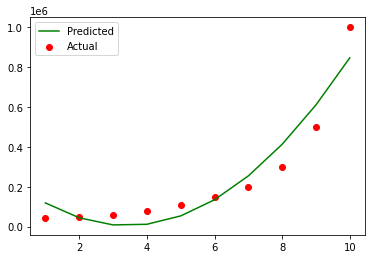

In [72]:
plt.scatter(df['Level'],df['Salary'],color='red',label='Actual')
plt.plot(df['Level'],y_pred_2,color='green',label='Predicted')
plt.legend()
plt.show()

In [106]:
mselst = list()
rmselst = list()


def fitPoly():

    for deg in range(2,11):
        pr = PolynomialFeatures(degree=deg)
        x_poly = pr.fit_transform(x)
        lr2.fit(x_poly,y)
        y_pred = lr2.predict(x_poly)
        mse = mean_squared_error(y_pred,y)
        mselst.append(mse)
        rmse = sqrt(mse)
        rmselst.append(rmse)

        plt.scatter(df['Level'],df['Salary'],color='red',label='Actual')
        plt.plot(df['Level'],y_pred,color='green',label='Predicted')
        plt.legend()
        plt.title(str(deg)+' Degree PLR')
        plt.show()

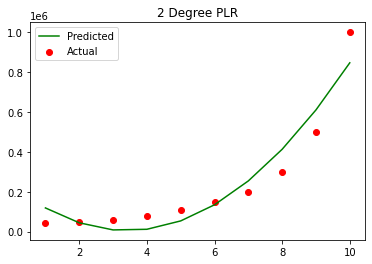

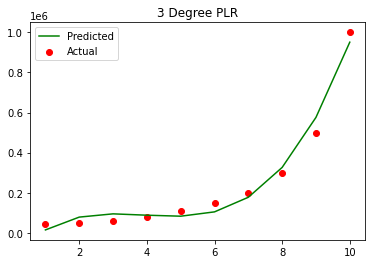

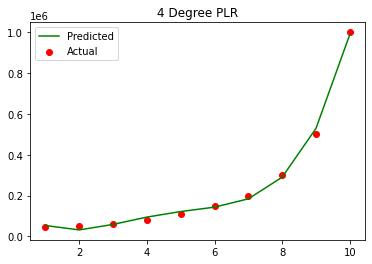

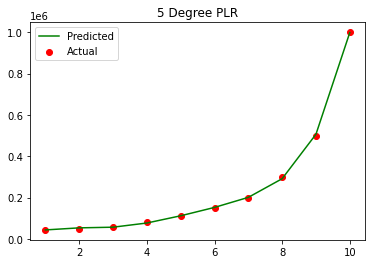

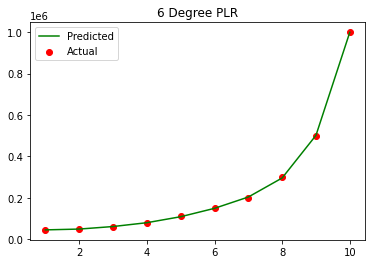

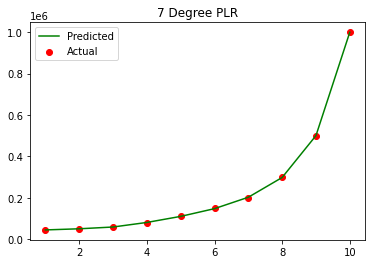

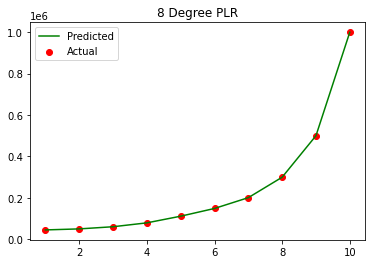

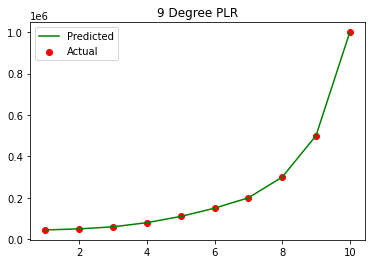

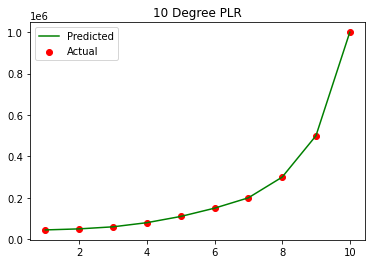

In [107]:
fitPoly()

In [108]:
[x for x in range(2,11)]

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [109]:
scores = pd.DataFrame({'Degree' : [x for x in range(2,11)], 'MSE' : mselst , 'RMSE' : rmselst})
scores

,Degree,MSE,RMSE
0,2,6.758833e+09,82212.124005
1,3,1.515662e+09,38931.504012
2,4,2.103438e+08,14503.234910
3,5,1.638228e+07,4047.503475
4,6,4.075466e+06,2018.778393
5,7,1.854072e+06,1361.643271
6,8,5.245269e+05,724.242324
7,9,1.234266e-03,0.035132
8,10,7.481052e-07,0.000865


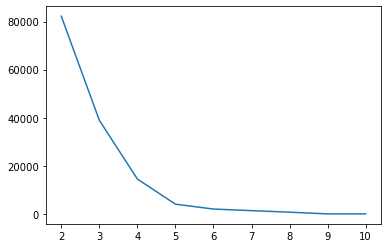

In [111]:
# plt.plot(scores.Degree,scores.MSE)
plt.plot(scores.Degree,scores.RMSE)